In [ ]:
# Install required packages if not already installed

In [ ]:
#id_intance

In [10]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import os
import tempfile
import gzip
import rarfile
from matplotlib.ticker import MaxNLocator
import itertools
from datetime import datetime, timedelta
import random
import seaborn as sns


In [11]:
def load_data(ruta):
    if ruta.endswith('.rar'):
        return load_data_from_rar(ruta)
    elif ruta.endswith('.json.gz'):
        with gzip.open(ruta, 'rt', encoding='utf-8') as f:
            return json.load(f)
    else:
        raise ValueError("Formato de archivo no soportado. Usa .json.gz")


In [30]:
# Ruta al archivo (ajusta si es necesario)
ruta_archivo = "dump_buffer_1747027718207.json.gz"

try:
    data = load_data(ruta_archivo)
    print(f"Datos cargados exitosamente desde {ruta_archivo}")
except Exception as e:
    print(f"Error al cargar: {e}")
    data = []

if data:
    df = pd.DataFrame(data)
    df.head()
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    # Extraer información útil 
    df['equipo'] = df['marcador'].apply(lambda x: x if x not in ['INICIO', 'FIN', 'NA'] else None)
    df['jugador'] = df['alias']
    df['accion'] = df['accion']
    
    print(f"Se cargaron {len(df)} registros")
    print(f"Columnas disponibles: {', '.join(df.columns)}")
else:
    print("No hay datos para procesar.")
    # Crear un DataFrame vacío para evitar errores
    df = pd.DataFrame(columns=['timestamp', 'equipo', 'jugador', 'accion', 'marcador', 'alias'])
df

Datos cargados exitosamente desde dump_buffer_1747027718207.json.gz
Se cargaron 27 registros
Columnas disponibles: timestamp, id_instancia, marcador, ip, alias, accion, args, equipo, jugador


,timestamp,id_instancia,marcador,ip,alias,accion,args,equipo,jugador
0,1970-01-21 05:17:05.920,721655,INICIO,127.0.0.1,system,distribute_message,"{""type"":""player_joined_team"",""target_teams"":""a...",None,system
1,1970-01-21 05:17:05.920,721655,ACTUALIZACIÓN,127.0.0.1:3030,benrrix,team_update,"{""team"":""equipo_dragon""}",ACTUALIZACIÓN,benrrix
2,1970-01-21 05:17:05.920,721655,FIN,127.0.0.1,system,distribute_message,"{""type"":""player_joined_team"",""success"":true}",None,system
3,1970-01-21 05:17:05.977,393087,INICIO,127.0.0.1,system,create_network,"{""max_players_per_team"":5,""max_score"":100,""tea...",None,system
4,1970-01-21 05:17:06.089,721655,INICIO,127.0.0.1,system,distribute_message,"{""type"":""player_joined_team"",""target_teams"":""a...",None,system
5,1970-01-21 05:17:06.089,721655,ACTUALIZACIÓN,127.0.0.1:3030,benrrix,team_update,"{""team"":""equipo_dragon""}",ACTUALIZACIÓN,benrrix
6,1970-01-21 05:17:06.089,721655,FIN,127.0.0.1,system,distribute_message,"{""type"":""player_joined_team"",""success"":true}",None,system
7,1970-01-21 05:17:06.089,721655,INICIO,127.0.0.1:3030,benrrix,join_team,"{""team"":""equipo_dragon""}",None,benrrix
8,1970-01-21 05:17:06.107,393087,INICIO,127.0.0.1,system,distribute_message,"{""type"":""player_joined_team"",""target_teams"":""a...",None,system
9,1970-01-21 05:17:06.107,393087,ACTUALIZACIÓN,127.0.0.1:3031,caro,team_update,"{""team"":""equipo_dragon""}",ACTUALIZACIÓN,caro


In [74]:
# Ejemplo de DataFrame con la columna id_instancia
import pandas as pd

df_prueba = pd.DataFrame({
    'timestamp': pd.date_range(start='2024-01-01', periods=20, freq='min'),
    'id_instancia': [1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4],
    'equipo': [
        'ACTUALIZACIÓN', 'ACTUALIZACIÓN', 'ACTUALIZACIÓN', 'ACTUALIZACIÓN', 'ACTUALIZACIÓN', 'ACTUALIZACIÓN', 'ACTUALIZACIÓN',
        'ACTUALIZACIÓN', 'ACTUALIZACIÓN', 'ACTUALIZACIÓN', 'ACTUALIZACIÓN', 'ACTUALIZACIÓN',
        'ACTUALIZACIÓN', 'ACTUALIZACIÓN', 'ACTUALIZACIÓN', 'ACTUALIZACIÓN', 'ACTUALIZACIÓN', 'ACTUALIZACIÓN', 'ACTUALIZACIÓN', 'ACTUALIZACIÓN'
    ],
    'jugador': [
        'Ana', 'Luis', 'Pedro', 'Carlos', 'Luis', 'Lucía', 'Ana',
        'Pedro', 'Ana', 'Carla', 'Carlos', 'Marco',
        'Luis', 'Lucía', 'Pedro', 'Marco', 'Ana', 'Carla', 'Tomás', 'Eva'
    ],
    'accion': ['actualización'] * 20,
    'marcador': ['NA'] * 20,
    'alias': [
        'Ana', 'Luis', 'Pedro', 'Carlos', 'Luis', 'Lucía', 'Ana',
        'Pedro', 'Ana', 'Carla', 'Carlos', 'Marco',
        'Luis', 'Lucía', 'Pedro', 'Marco', 'Ana', 'Carla', 'Tomás', 'Eva'
    ],
    'args': [
        '{"team": "fuego_rojo"}', '{"team": "agua_azul"}', '{"team": "fuego_rojo"}',
        '{"team": "viento_verde"}', '{"team": "agua_azul"}', '{"team": "fuego_rojo"}', '{"team": "tierra_marron"}',
        '{"team": "viento_verde"}', '{"team": "fuego_rojo"}', '{"team": "tierra_marron"}', '{"team": "agua_azul"}', '{"team": "sombra_negra"}',
        '{"team": "luz_blanca"}', '{"team": "fuego_rojo"}', '{"team": "sombra_negra"}', '{"team": "luz_blanca"}',
        '{"team": "viento_verde"}', '{"team": "tierra_marron"}', '{"team": "fuego_rojo"}', '{"team": "agua_azul"}'
    ]
})


def jugadores_por_equipo_instancia_pie(instancia):
    # 1. Filtrar acciones de tipo 'actualización'
    df_join = df_prueba[df_prueba['equipo'] == 'ACTUALIZACIÓN']
    df_join = df_join[df_join['id_instancia'] == instancia]

    # 2. Extraer el nombre del equipo desde la columna 'args'
    def extraer_equipo(arg):
        try:
            return json.loads(arg).get('team')
        except:
            return None

    df_join['equipo'] = df_join['args'].apply(extraer_equipo)

    # 3. Filtrar solo filas válidas
    df_join = df_join[df_join['equipo'].notnull()]

    if df_join.empty:
        print("No se encontraron jugadores que se hayan unido a un equipo.")
        return

    # 4. Contar jugadores únicos por equipo
    conteo = df_join.groupby('equipo')['jugador'].nunique()
    conteo.index = [nombre.replace('_', ' ').title() for nombre in conteo.index]

    # 5. Graficar Pie Chart
    colores = plt.cm.Pastel1.colors
    plt.figure(figsize=(8, 6))
    conteo.plot(
        kind='pie',
        autopct='%1.1f%%',
        colors=colores[:len(conteo)],
        startangle=140,
        wedgeprops={'edgecolor': 'black'}
    )
    plt.title(f"Distribución de jugadores por equipo\nPartida {instancia}")
    plt.ylabel("")  # Ocultar label y-axis
    plt.tight_layout()
    plt.show()

# Selector para instancias
instance_selector = widgets.Dropdown(
    options=[(f"Partida {i}", i) for i in df_prueba['id_instancia'].unique()],
    value=df_prueba['id_instancia'].unique()[0],
    description="Partida:"
)

print("1. Jugadores por equipo (Gráfico de Torta)")
widgets.interact(jugadores_por_equipo_instancia_pie, instancia=instance_selector)




1. Jugadores por equipo (Gráfico de Torta)


interactive(children=(Dropdown(description='Partida:', options=(('Partida 1', 1), ('Partida 2', 2), ('Partida …

<function __main__.jugadores_por_equipo_instancia_pie(instancia)>

In [80]:
def acciones_por_jugador(instancia, acc):
    # Filtrar el DataFrame por id_instancia y acción
    jugadas_accion_x = df[(df['id_instancia'] == instancia) & (df['accion'] == acc)]

    if jugadas_accion_x.empty:
        print(f"No hay datos para mostrar para la partida {instancia} y acción {acc}.")
        return
    
    # Contar las jugadas por jugador
    jugadas = jugadas_accion_x.groupby('jugador')['accion'].count()
    
    # Convertimos a lista de colores
    colores = list(plt.cm.Pastel2.colors)
    
    # Crear gráfico con colores variados (repite si hay más equipos que colores)
    ax = jugadas.plot(
        kind='bar', 
        color=colores[:len(jugadas)], 
        edgecolor='black'
    )
    
    # Eje Y sin decimales
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.title(f"Acciones realizadas por jugador (Partica {instancia})")
    plt.ylabel("Cantidad de acci")
    plt.xlabel("Jugador")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Crear el widget para seleccionar la id_instancia y la acción con un Dropdown
instance_selector = widgets.Dropdown(
    options=[(f"Partida {i}", i) for i in df['id_instancia'].unique()],
    value=df['id_instancia'].unique()[0],  # Valor por defecto
    description="Partida:",
)

df_filtrado = df[df['jugador'] != 'system']

action_selector = widgets.Dropdown(
    options=[(a.replace('_', ' ').title(), a) for a in df_filtrado['accion'].dropna().unique()],
    value=df_filtrado['accion'].dropna().unique()[0],
    description="Acción:",
)

# Usar interact para vincular los widgets a la función
print("2. Acciónes por jugador por instancia")
widgets.interact(acciones_por_jugador, instancia=instance_selector, acc=action_selector)


2. Acciónes por jugador por instancia


interactive(children=(Dropdown(description='Partida:', options=(('Partida 721655', 721655), ('Partida 393087',…

<function __main__.acciones_por_jugador(instancia, acc)>

In [83]:
def acciones_por_system(instancia):
    # Filtrar el DataFrame por id_instancia y solo para el jugador 'system'
    jugadas_accion_system = df[(df['id_instancia'] == instancia) & (df['jugador'] == 'system')]

    if jugadas_accion_system.empty:
        print(f"No hay datos para mostrar para la partida {instancia} de 'system'.")
        return
    
    # Contar las jugadas de 'system' por acción
    jugadas = jugadas_accion_system.groupby('accion')['jugador'].count()

    # Convertimos a lista de colores
    colores = list(plt.cm.Pastel1.colors)

    # Crear gráfico de barras
    ax = jugadas.plot(
        kind='bar',
        color=colores[:len(jugadas)],  # Utilizamos colores para cada acción
        edgecolor='black'
    )
    # Modificar etiquetas del eje X con formato replace y title
    ax.set_xticklabels([a.replace('_', ' ').title() for a in jugadas.index])
    # Eje Y sin decimales
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.title(f"Acciones realizadas por el sistema (Partida {instancia})")
    plt.ylabel("Cantidad de acciones")
    plt.xlabel("Acción")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Crear el widget para seleccionar la id_instancia
instance_selector_system = widgets.Dropdown(
    options=[(f"Partida {i}", i) for i in df['id_instancia'].unique()],
    value=df['id_instancia'].unique()[0],  # Valor por defecto
    description="Partida:",
)

# Usar interact para vincular el widget a la función
print("3. Acciones realizadas por 'system' por instancia")
widgets.interact(acciones_por_system, instancia=instance_selector_system)


3. Acciones realizadas por 'system' por instancia


interactive(children=(Dropdown(description='Partida:', options=(('Partida 721655', 721655), ('Partida 393087',…

<function __main__.acciones_por_system(instancia)>

In [88]:
# Fecha base para los timestamps
base_time = datetime(2023, 5, 1, 14, 0, 0)

# Crear datos de prueba
np.random.seed(42)  # Para reproducibilidad

# Configuración
num_instancias = 3  # Número de instancias de juego
num_equipos = 4     # Número de equipos por instancia
num_jugadores = 3   # Número de jugadores por equipo
num_turnos = 15     # Número de turnos por equipo

# Listas para almacenar los datos
data = []

# Nombres de equipos
nombres_equipos = ['equipo_dragon', 'equipo_fenix', 'equipo_kraken', 'equipo_grifo', 
                  'equipo_minotauro', 'equipo_pegaso', 'equipo_quimera', 'equipo_unicornio']

# Nombres de jugadores
nombres_jugadores = ['alex', 'benrrix', 'carlos', 'diana', 'elena', 'felix', 'gabriel', 
                    'hector', 'isabel', 'julia', 'kevin', 'laura', 'mario', 'nora', 'oscar']

# Generar datos para cada instancia
for id_instancia in range(1, num_instancias + 1):
    # Configuración de la instancia
    current_time = base_time + timedelta(minutes=id_instancia * 30)  # Cada instancia comienza 30 min después
    
    # Evento de inicio de red
    data.append({
        'timestamp': current_time,
        'id_instancia': id_instancia,
        'marcador': 'INICIO',
        'ip': '127.0.0.1',
        'alias': 'system',
        'accion': 'create_network',
        'args': '{"max_players_per_team":5,"max_score":100,"teams":["equipo_dragon","equipo_fenix","equipo_kraken","equipo_grifo"]}',
        'equipo': None,
        'jugador': 'system'
    })
    
    current_time += timedelta(seconds=5)
    
    # Seleccionar equipos para esta instancia
    equipos_instancia = nombres_equipos[:(num_equipos)]
    
    # Para cada equipo
    for i, equipo in enumerate(equipos_instancia):
        # Seleccionar jugadores para este equipo
        jugadores_equipo = nombres_jugadores[i*num_jugadores:(i+1)*num_jugadores]
        
        # Eventos de unión de jugadores al equipo
        for jugador in jugadores_equipo:
            current_time += timedelta(seconds=np.random.randint(1, 5))
            
            # Mensaje de distribución - Jugador unido al equipo
            data.append({
                'timestamp': current_time,
                'id_instancia': id_instancia,
                'marcador': 'INICIO',
                'ip': '127.0.0.1',
                'alias': 'system',
                'accion': 'distribute_message',
                'args': f'{{"type":"player_joined_team","target_teams":"{equipo}"}}',
                'equipo': None,
                'jugador': 'system'
            })
            
            # Actualización de equipo
            data.append({
                'timestamp': current_time,
                'id_instancia': id_instancia,
                'marcador': 'ACTUALIZACIÓN',
                'ip': f'127.0.0.1:{3030+i*100+jugadores_equipo.index(jugador)}',
                'alias': jugador,
                'accion': 'team_update',
                'args': f'{{"team":"{equipo}"}}',
                'equipo': 'ACTUALIZACIÓN',
                'jugador': jugador
            })
            
            # Mensaje de distribución - Éxito
            data.append({
                'timestamp': current_time,
                'id_instancia': id_instancia,
                'marcador': 'FIN',
                'ip': '127.0.0.1',
                'alias': 'system',
                'accion': 'distribute_message',
                'args': '{"type":"player_joined_team","success":true}',
                'equipo': None,
                'jugador': 'system'
            })
    
    # Avanzar tiempo para los turnos
    current_time += timedelta(seconds=30)
    
    # Simulación de lanzamiento de dados por turnos
    for turno in range(num_turnos):
        for i, equipo in enumerate(equipos_instancia):
            # Seleccionar jugadores para este equipo
            jugadores_equipo = nombres_jugadores[i*num_jugadores:(i+1)*num_jugadores]
            
            # Jugador aleatorio del equipo lanza el dado
            jugador = np.random.choice(jugadores_equipo)
            
            # Avanzar tiempo
            current_time += timedelta(seconds=np.random.randint(5, 15))
            
            # Valor del dado - más alto para equipos con índice bajo para crear líderes
            # Equipos con índice bajo tienen ventaja
            ventaja = max(0, 3 - i)  # Equipos 0, 1, 2 tienen ventaja 3, 2, 1
            valor_dado = np.random.randint(1, 7) + ventaja
            
            # Lanzamiento de dado
            data.append({
                'timestamp': current_time,
                'id_instancia': id_instancia,
                'marcador': 'ACTUALIZACIÓN',
                'ip': f'127.0.0.1:{3030+i*100+jugadores_equipo.index(jugador)}',
                'alias': jugador,
                'accion': f'roll_dice',
                'args': f'{{"tnumber":"{valor_dado}"}}',
                'equipo': equipo,
                'jugador': jugador
            })

# Crear el DataFrame de prueba
df_prueba = pd.DataFrame(data)

# Convertir 'timestamp' a datetime si no lo es ya
if not pd.api.types.is_datetime64_any_dtype(df_prueba['timestamp']):
    df_prueba['timestamp'] = pd.to_datetime(df_prueba['timestamp'])

# Mostrar la información del conjunto de datos
print(f"Datos de prueba generados:")
print(f"- {len(df_prueba)} registros totales")
print(f"- {df_prueba['id_instancia'].nunique()} instancias de juego")
print(f"- {df_prueba[df_prueba['accion'] == 'roll_dice']['equipo'].nunique()} equipos con lanzamientos")
print(f"- {df_prueba[df_prueba['accion'] == 'roll_dice']['jugador'].nunique()} jugadores que lanzaron dados")

# Mostrar un ejemplo de los datos
print("\nEjemplo de los datos:")
df_prueba

Datos de prueba generados:
- 291 registros totales
- 3 instancias de juego
- 4 equipos con lanzamientos
- 12 jugadores que lanzaron dados

Ejemplo de los datos:


,timestamp,id_instancia,marcador,ip,alias,accion,args,equipo,jugador
0,2023-05-01 14:30:00,1,INICIO,127.0.0.1,system,create_network,"{""max_players_per_team"":5,""max_score"":100,""tea...",None,system
1,2023-05-01 14:30:08,1,INICIO,127.0.0.1,system,distribute_message,"{""type"":""player_joined_team"",""target_teams"":""e...",None,system
2,2023-05-01 14:30:08,1,ACTUALIZACIÓN,127.0.0.1:3030,alex,team_update,"{""team"":""equipo_dragon""}",ACTUALIZACIÓN,alex
3,2023-05-01 14:30:08,1,FIN,127.0.0.1,system,distribute_message,"{""type"":""player_joined_team"",""success"":true}",None,system
4,2023-05-01 14:30:12,1,INICIO,127.0.0.1,system,distribute_message,"{""type"":""player_joined_team"",""target_teams"":""e...",None,system
...,...,...,...,...,...,...,...,...,...
286,2023-05-01 15:39:13,3,ACTUALIZACIÓN,127.0.0.1:3331,kevin,roll_dice,"{""tnumber"":""1""}",equipo_grifo,kevin
287,2023-05-01 15:39:20,3,ACTUALIZACIÓN,127.0.0.1:3031,benrrix,roll_dice,"{""tnumber"":""4""}",equipo_dragon,benrrix
288,2023-05-01 15:39:33,3,ACTUALIZACIÓN,127.0.0.1:3130,diana,roll_dice,"{""tnumber"":""5""}",equipo_fenix,diana
289,2023-05-01 15:39:44,3,ACTUALIZACIÓN,127.0.0.1:3230,gabriel,roll_dice,"{""tnumber"":""5""}",equipo_kraken,gabriel


In [89]:
# 3. Curvas de puntuación por equipo a través del tiempo
def curvas_puntuacion(id_instancia):
    """
    Genera gráfico de curvas de puntuación por equipo en una instancia específica.
    
    Args:
        id_instancia: ID de la instancia de juego a visualizar
    """
    # Filtramos el DataFrame por la instancia seleccionada
    df_instancia = df_prueba[df_prueba['id_instancia'] == id_instancia]
    
    if len(df_instancia) == 0:
        plt.figure(figsize=(10, 6))
        plt.text(0.5, 0.5, f"No hay datos para la instancia {id_instancia}", 
                 horizontalalignment='center', verticalalignment='center',
                 fontsize=14)
        plt.tight_layout()
        plt.show()
        return
    
    # Nos quedamos solo con las acciones de tipo roll_dice (lanzamiento de dados)
    # y actualizaciones de equipo
    equipos_df = df_instancia[
        (df_instancia['accion'].str.contains('roll_dice', na=False)) | 
        (df_instancia['accion'].str.contains('team_update', na=False))
    ].copy()
    
    if len(equipos_df) == 0:
        plt.figure(figsize=(10, 6))
        plt.text(0.5, 0.5, f"No hay datos de lanzamientos o actualizaciones para la instancia {id_instancia}", 
                 horizontalalignment='center', verticalalignment='center',
                 fontsize=14)
        plt.tight_layout()
        plt.show()
        return
    
    # Extraemos el número del dado del args (si está disponible)
    def extract_dice_number(args_str):
        if not isinstance(args_str, str):
            return 0
        try:
            if 'tnumber' in args_str:
                # Intentar extraer el número después de "tnumber":"
                import re
                match = re.search(r'tnumber["\']?\s*:\s*["\']?(\d+)', args_str)
                if match:
                    return int(match.group(1))
            return 0
        except:
            return 0
    
    # Aplicamos la función para extraer el número del dado
    equipos_df['dice_value'] = equipos_df['args'].apply(extract_dice_number)
    
    # MODIFICADO: Usamos solo los equipos válidos, ignorando jugadores
    # Filtramos para mantener solo registros con equipos válidos
    equipos_df = equipos_df[
        (equipos_df['equipo'].notna()) & 
        (~equipos_df['equipo'].isin(['None', 'NA', 'INICIO', 'FIN', 'ACTUALIZACIÓN']))
    ]
    
    if len(equipos_df) == 0:
        plt.figure(figsize=(10, 6))
        plt.text(0.5, 0.5, f"No hay equipos válidos para la instancia {id_instancia}", 
                 horizontalalignment='center', verticalalignment='center',
                 fontsize=14)
        plt.tight_layout()
        plt.show()
        return
    
    # Creamos puntuación acumulativa por equipo
    equipos_df = equipos_df.sort_values('timestamp')
    
    # Agrupamos por equipo y timestamp, y sumamos los valores de los dados
    puntaje_equipos = equipos_df.groupby(['equipo', 'timestamp'])['dice_value'].sum().reset_index()
    
    # Calculamos el puntaje acumulativo para cada equipo
    equipos_unicos = puntaje_equipos['equipo'].unique()
    
    # Preparamos el DataFrame para el pivot
    puntajes_acumulados = []
    
    for equipo in equipos_unicos:
        equipo_df = puntaje_equipos[puntaje_equipos['equipo'] == equipo].copy()
        equipo_df['puntaje_acumulado'] = equipo_df['dice_value'].cumsum()
        puntajes_acumulados.append(equipo_df)
    
    # Combinamos todos los equipos
    if puntajes_acumulados:
        puntajes_df = pd.concat(puntajes_acumulados)
        
        # Creamos la tabla pivote para graficar
        pivot = puntajes_df.pivot_table(
            index='timestamp', 
            columns='equipo',  # Cambiado de 'equipo_final' a 'equipo'
            values='puntaje_acumulado',
            aggfunc='max'
        ).fillna(method='ffill').fillna(0)
        
        # Usar colores pastel del colormap
        colores = plt.cm.Pastel2.colors[:len(pivot.columns)]
        
        # Verificamos si hay valores faltantes
        if pivot.empty:
            plt.figure(figsize=(10, 6))
            plt.text(0.5, 0.5, f"No hay suficientes datos para generar el gráfico", 
                    horizontalalignment='center', verticalalignment='center',
                    fontsize=14)
            plt.tight_layout()
            plt.show()
            return
        
        # Gráfico con colores pastel y marcadores
        ax = pivot.plot(
            figsize=(12, 7),
            marker='o', 
            color=colores,
            linewidth=2.5,
            markersize=8
        )
        
        # Mejoras estéticas
        plt.title(f"Curvas de puntuación por equipo (Partida {id_instancia})", fontsize=16, pad=20)
        plt.xlabel("Tiempo", fontsize=12)
        plt.ylabel("Puntaje acumulado", fontsize=12)
        
        # Obtener el valor máximo para establecer el límite y
        max_value = pivot.max().max()
        plt.ylim(0, max(105, max_value * 1.1))  # Añadir un 10% de espacio adicional
        
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend(title="Equipos", fontsize=10, title_fontsize=12)
        
        # Formato del eje X para mostrar solo HH:MM:SS
        from matplotlib.dates import DateFormatter
        ax.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()
    else:
        plt.figure(figsize=(10, 6))
        plt.text(0.5, 0.5, f"No hay datos de puntajes para la instancia {id_instancia}", 
                horizontalalignment='center', verticalalignment='center',
                fontsize=14)
        plt.tight_layout()
        plt.show()

# Primero obtenemos las instancias únicas disponibles en el DataFrame
instancias_disponibles = sorted(df_prueba['id_instancia'].unique())

# Si no hay instancias, proveer un valor por defecto
if not instancias_disponibles:
    instancias_disponibles = [1]

# Crear el widget para seleccionar la id_instancia con un Dropdown
instance_selector = widgets.Dropdown(
    options=[(f"Partida {i}", i) for i in instancias_disponibles],
    value=instancias_disponibles[0],  # Valor por defecto
    description="Juego:",
    style={'description_width': 'initial'}
)

print("3. Puntuación por equipo")
# Usar el widget para mostrar el gráfico para la instancia seleccionada
widgets.interact(curvas_puntuacion, id_instancia=instance_selector)

3. Puntuación por equipo


interactive(children=(Dropdown(description='Juego:', options=(('Partida 1', 1), ('Partida 2', 2), ('Partida 3'…

<function __main__.curvas_puntuacion(id_instancia)>

In [77]:
# Configuración
random.seed(42)
num_equipos = 4
tiempo_total = 300  # segundos (5 minutos)
intervalo = 5       # cada cuánto tiempo se actualiza el estado
equipos = [f"Equipo {i+1}" for i in range(num_equipos)]
num_instancias = 3  # Número de instancias de juegos

# Tiempos de actualización
timestamps = [datetime.now() + timedelta(seconds=i) for i in range(0, tiempo_total, intervalo)]

# Generar progresión para cada equipo y cada instancia de juego
data = []
for instance in range(1, num_instancias + 1):
    for equipo in equipos:
        marcador = 0
        for t in timestamps:
            # Progresión aleatoria por intervalo (más alta para un equipo)
            avance = random.randint(1, 6) if equipo != "Equipo 1" else random.randint(3, 6)
            marcador = min(marcador + avance, 100)
            data.append({'id_instancia': instance, 'timestamp': t, 'equipo': equipo, 'marcador': marcador})
            if marcador == 100:
                break  # ese equipo llegó al máximo

# Crear el DataFrame con los datos generados
df_prueba = pd.DataFrame(data)
df_prueba = df_prueba.sort_values(by='timestamp').reset_index(drop=True)

# 3. Curvas de puntuación por equipo a través del tiempo
def curvas_puntuacion(id_instancia):
    # Filtramos el DataFrame por la instancia seleccionada
    df_instancia = df_prueba[df_prueba['id_instancia'] == id_instancia]
    
    # Nos quedamos con el valor más reciente del marcador para cada timestamp y equipo
    equipos = df_instancia[df_instancia['equipo'].notnull()].copy()
    equipos = equipos.sort_values('timestamp')

    pivot = equipos.pivot_table(index='timestamp', columns='equipo', values='marcador', aggfunc='max').fillna(method='ffill').fillna(0)
    # Usar colores pastel
    colores = plt.cm.Pastel2.colors  
    
    # Gráfico con colores pastel
    pivot.plot(marker='o', color=colores[:len(pivot.columns)]) 
    plt.title(f"Curvas de puntuación por equipo (Partida {id_instancia})")
    plt.xlabel("Tiempo")
    plt.ylabel("Puntaje acumulado")
    plt.ylim(0, 105)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Crear el widget para seleccionar la id_instancia con un Dropdown
instance_selector = widgets.Dropdown(
    options=[(f"Partida {i}", i) for i in range(1, num_instancias + 1)],  # Opciones: Instancia 1, Instancia 2, ...
    value=1,  # Valor por defecto
    description="Juego:",
)
print("3. Puntuación por equipo")
# Usar el widget para mostrar el gráfico para la instancia seleccionada
widgets.interact(curvas_puntuacion, id_instancia=instance_selector)

3. Puntuación por equipo


interactive(children=(Dropdown(description='Juego:', options=(('Partida 1', 1), ('Partida 2', 2), ('Partida 3'…

<function __main__.curvas_puntuacion(id_instancia)>

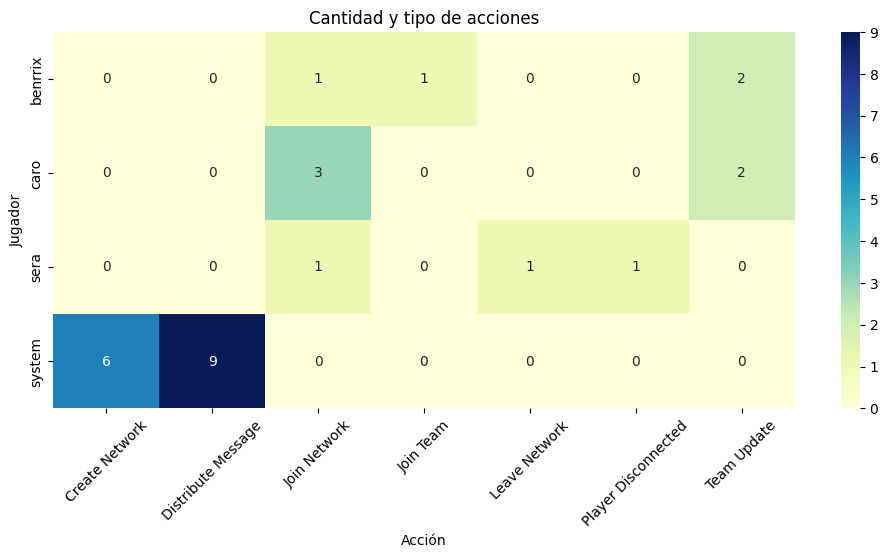

5. Cantidad y tipo de acciones


In [78]:
# Agrupar por jugador y tipo de acción
pivot = df.pivot_table(index='jugador', columns='accion', aggfunc='size', fill_value=0)
pivot.columns = [col.replace('_', ' ').title() for col in pivot.columns]

# Graficar
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Cantidad y tipo de acciones")
plt.ylabel("Jugador")
plt.xlabel("Acción")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()
print("5. Cantidad y tipo de acciones")

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from datetime import timedelta
import ipywidgets as widgets

# Asegúrate de convertir correctamente timestamp con milisegundos
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Base mínima
base_time = df['timestamp'].min()

# Acciones posibles
acciones_posibles = sorted(df['accion'].dropna().unique().tolist())

# Convertir a milisegundos
min_ms = int((df['timestamp'].min() - base_time).total_seconds() * 1000)
max_ms = int((df['timestamp'].max() - base_time).total_seconds() * 1000)

# Ventana global en milisegundos (al menos 100ms)
ventana_y_global = max(100, (max_ms - min_ms) // 10)
df['window_global'] = ((df['timestamp'] - base_time).dt.total_seconds() * 1000 // ventana_y_global).astype(int)
conteo_global = df.groupby(['window_global', 'accion']).size().unstack(fill_value=0)
limite_y_global = conteo_global.max().max()

# Widgets
# Paso sugerido: uno que no sea demasiado fino ni demasiado grueso
paso_ms = max(100, (max_ms - min_ms) // 100)

# Generar opciones de tiempo redondeadas al paso
rango_ms = list(range(min_ms, max_ms + paso_ms, paso_ms))
index_inicial = (0, len(rango_ms) - 1)

rango_slider = widgets.SelectionRangeSlider(
    options=rango_ms,
    index=index_inicial,
    description='Rango tiempo (ms):',
    layout={'width': '600px'},
    style={'description_width': 'initial'}
)


nombre_sin_ = {a: a.replace('_', ' ').title() for a in acciones_posibles}
opciones_dropdown = [('Todas', 'Todas')] + [(nombre_sin_[a], a) for a in acciones_posibles]

acciones_dropdown = widgets.SelectMultiple(
    options=opciones_dropdown,
    value=('Todas',),
    description='Acciones:',
    style={'description_width': 'initial'}
)

# Función gráfica
def acciones_en_curvas(rango, acciones):
    desde, hasta = rango
    if desde >= hasta:
        print("⚠️ El límite inferior debe ser menor que el superior.")
        return

    if 'Todas' in acciones:
        acciones_filtradas = df['accion'].unique().tolist()
    else:
        acciones_filtradas = list(acciones)

    df_filtrado = df[df['accion'].isin(acciones_filtradas)].copy()

    tiempo_min = base_time + timedelta(milliseconds=desde)
    tiempo_max = base_time + timedelta(milliseconds=hasta)
    df_filtrado = df_filtrado[(df_filtrado['timestamp'] >= tiempo_min) & (df_filtrado['timestamp'] <= tiempo_max)]

    if df_filtrado.empty:
        print("⚠️ No hay datos en el rango de tiempo seleccionado.")
        return

    duracion = hasta - desde
    ventana = max(100, duracion // 10)  # ventana en milisegundos

    df_filtrado['window'] = ((df_filtrado['timestamp'] - base_time).dt.total_seconds() * 1000 // ventana).astype(int)
    conteo = df_filtrado.groupby(['window', 'accion']).size().unstack(fill_value=0)

    all_windows = range(int(desde // ventana), int(hasta // ventana) + 1)
    conteo = conteo.reindex(all_windows, fill_value=0)

    centro_tiempos = [((w * ventana) + ((w + 1) * ventana)) / 2 for w in conteo.index]

    colores = list(itertools.islice(itertools.cycle(plt.cm.tab10.colors), len(conteo.columns)))
    fig, ax = plt.subplots()
    for i, accion in enumerate(conteo.columns):
        ax.plot(centro_tiempos, conteo[accion], marker='o', label=nombre_sin_[accion], color=colores[i])

    plt.title(f"Acciones por tiempo ({desde} - {hasta} ms)")
    plt.xlabel("Tiempo (ms)")
    plt.ylabel("Cantidad de acciones")
    plt.ylim(0, limite_y_global + 1)
    plt.xticks(rotation=45)
    plt.grid(True)
    

    plt.legend(title="Acción")
    plt.tight_layout()
    plt.show()
# Interfaz
ui = widgets.VBox([acciones_dropdown, rango_slider])
out = widgets.interactive_output(acciones_en_curvas, {
    'rango': rango_slider,
    'acciones': acciones_dropdown
})
print("6. Acciones realizadas por ventana de tiempo")
display(ui, out)


6. Acciones realizadas por ventana de tiempo


Output()

In [36]:
# Funciones de validación de datos

def validate_data():
    """Valida la estructura y contenido de los datos cargados."""
    validation_results = {
        'errors': [],
        'warnings': [],
        'info': []
    }
    
    # Verificar si hay datos
    if len(df) == 0:
        validation_results['errors'].append("No hay datos para analizar")
        return validation_results
    
    # Verificar columnas requeridas
    required_columns = ['timestamp', 'equipo', 'jugador', 'accion', 'marcador']
    missing_columns = [col for col in required_columns if col not in df.columns]
    
    if missing_columns:
        validation_results['errors'].append(f"Faltan columnas requeridas: {', '.join(missing_columns)}")
    
    # Verificar valores nulos
    null_counts = df[df.columns].isnull().sum()
    for col, count in null_counts.items():
        if count > 0:
            validation_results['warnings'].append(f"La columna '{col}' tiene {count} valores nulos ({count/len(df)*100:.1f}%)")
    
    # Verificar rango de fechas
    if 'timestamp' in df.columns and not df['timestamp'].isnull().all():
        min_date = df['timestamp'].min()
        max_date = df['timestamp'].max()
        duration = max_date - min_date
        validation_results['info'].append(f"Rango de fechas: {min_date} a {max_date} (duración: {duration})")
    
    # Información sobre equipos y jugadores
    if 'equipo' in df.columns:
        equipos = df[df['equipo'].notnull()]['equipo'].unique()
        validation_results['info'].append(f"Equipos detectados ({len(equipos)}): {', '.join(equipos)}")
    
    if 'jugador' in df.columns:
        jugadores = df[df['jugador'].notnull()]['jugador'].unique()
        validation_results['info'].append(f"Jugadores detectados: {len(jugadores)}")
    
    return validation_results

# Ejecutar validación
results = validate_data()

# Mostrar resultados
for category in ['errors', 'warnings', 'info']:
    if results[category]:
        print(f"\n{category.upper()}:")
        for item in results[category]:
            print(f"- {item}")


WARNINGS:
- La columna 'equipo' tiene 22 valores nulos (81.5%)

INFO:
- Rango de fechas: 1970-01-21 05:17:05.920000 a 1970-01-21 05:17:07.533000 (duración: 0 days 00:00:01.613000)
- Equipos detectados (2): ACTUALIZACIÓN, DESCONEXIÓN
- Jugadores detectados: 4
